In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"c:\Users\UJJAWAL\Desktop\boat_products_analysis (1).csv "
df = pd.read_csv(file_path)

In [6]:
print(df)

          ASIN                                              Title  Price  \
0   B0DQKY3R84  boAt New Launch Nirvana X TWS,Knowles Dual Dri...   2999   
1   B0D4Z148NG  Tribit StormBox Mini 12W 5.4 Bluetooth Wireles...   1999   
2   B0CFFWP1QS  Carlington Resin Endurance Analog-Digital Spor...   1299   
3   B0DZXTVL6V  boAt New Launch Airdopes Plus 311, Glass Desig...    999   
4   B0CKJ8JL1Y  boAt Rockerz 110/Rockerz 109 Wireless Neckband...    751   
5   B0CZ3ZPD8B  boAt Airdopes 311 Pro, 50HRS Battery, Fast Cha...    999   
6   B0D5CYDG22  boAt Airdopes Atom 81 Pro, 100Hrs Battery, 4Mi...    899   
7   B0CP54XBWN  boAt Airdopes 91, 45HRS Battery, 50ms Low Late...    999   
8   B08TV2P1N8  boAt Rockerz 255 Pro+, 60HRS Battery, Fast Cha...   1299   
9   B071Z8M4KX  boAt Bassheads 100 in Ear Wired Earphones with...    349   
10  B0DBHDRFZ8  boAt Rockerz 150 Pro Bluetooth Neckband Earpho...   1399   
11  B09N3ZNHTY  boAt Airdopes 141 / Airdopes 148, Low Latency,...   1099   
12  B0CZ426L

In [7]:
# Extract Product Category

def get_category(title):
    title = str(title).lower()
    if 'earbud' in title or 'airdope' in title:
        return 'Earbuds'
    elif 'neckband' in title or 'collar' in title:
        return 'Neckband'
    elif 'headphone' in title:
        return 'Headphones'
    elif 'watch' in title or 'smartwatch' in title:
        return 'Smartwatch'
    elif 'speaker' in title:
        return 'Speaker'
    else:
        return 'Other'

df['Product_Category'] = df['Title'].apply(get_category)

# Clean Sales Volume
df['Sales_Volume_Clean'] = df['Sales_Volume'].str.replace(' bought in past month', '', regex=False)
df['Sales_Volume_Clean'] = df['Sales_Volume_Clean'].str.replace('+', '', regex=False)

def convert_volume(x):
    if pd.isna(x):
        return np.nan
    x = x.upper().strip()
    if 'K' in x:
        return float(x.replace('K', '')) * 1000
    elif 'L' in x:
        return float(x.replace('L', '')) * 100000
    else:
        try:
            return float(x)
        except:
            return np.nan

df['Sales_Volume_Clean'] = df['Sales_Volume_Clean'].apply(convert_volume)

# Add Discount %
df['Discount_Percent'] = ((df['Price_Strikethrough'] - df['Price']) / df['Price_Strikethrough']) * 100
df['Discount_Percent'] = df['Discount_Percent'].round(2)


In [8]:
# Top & Bottom by Sales
top5_sales = df.sort_values(by='Sales_Volume_Clean', ascending=False).head(5)
bottom5_sales = df.sort_values(by='Sales_Volume_Clean', ascending=True).head(5)

# Top & Bottom by Rating (only with reviews > 50)
top5_rating = df[df['Reviews_Count'] > 50].sort_values(by='Rating', ascending=False).head(5)
bottom5_rating = df[df['Reviews_Count'] > 50].sort_values(by='Rating', ascending=True).head(5)

# Top & Bottom by Reviews
top5_reviews = df.sort_values(by='Reviews_Count', ascending=False).head(5)
bottom5_reviews = df.sort_values(by='Reviews_Count', ascending=True).head(5)


C:\Users\UJJAWAL\AppData\Local\Temp\ipykernel_8980\1317933715.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


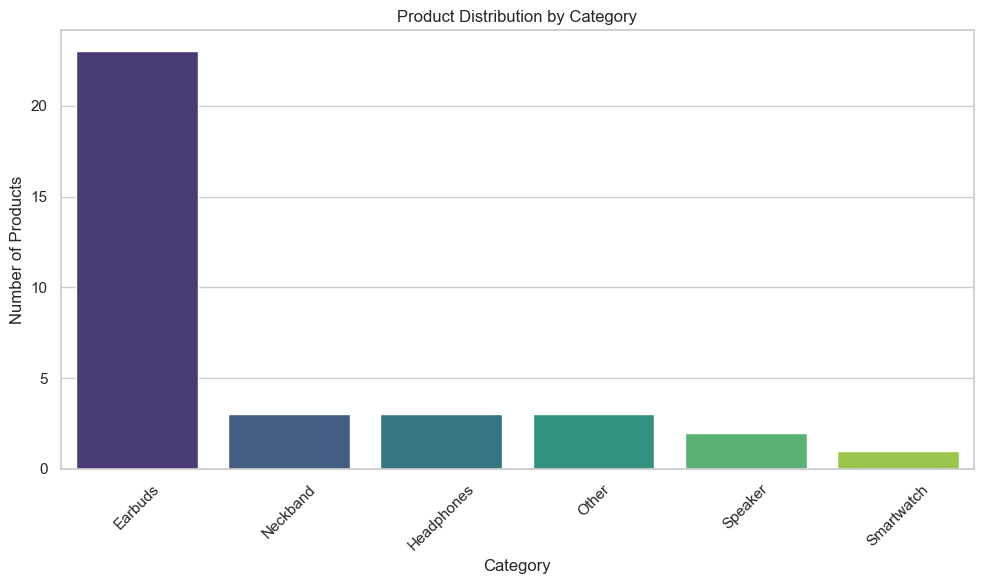

In [9]:
# Product Category Distribution

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
category_counts = df['Product_Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\UJJAWAL\AppData\Local\Temp\ipykernel_8980\4271771102.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_sales_plot['Title'], x=top_sales_plot['Sales_Volume_Clean'], palette="crest")
C:\Users\UJJAWAL\AppData\Local\Temp\ipykernel_8980\4271771102.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


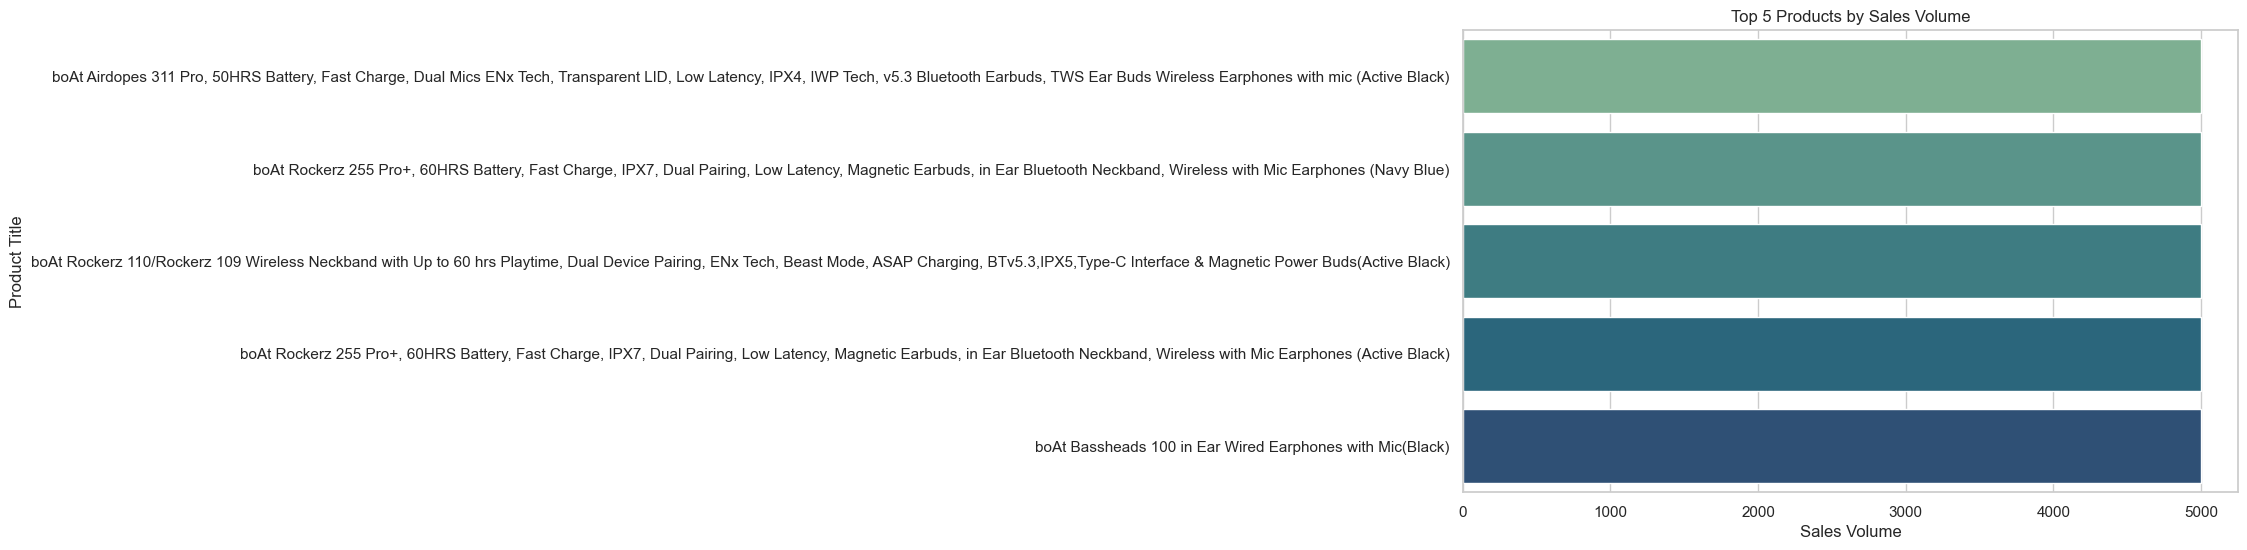

In [10]:
# TOP 5 SALES BY VOLUME

plt.figure(figsize=(10, 6))
top_sales_plot = top5_sales.sort_values(by='Sales_Volume_Clean', ascending=True)
sns.barplot(y=top_sales_plot['Title'], x=top_sales_plot['Sales_Volume_Clean'], palette="crest")
plt.title('Top 5 Products by Sales Volume')
plt.xlabel('Sales Volume')
plt.ylabel('Product Title')
plt.tight_layout()
plt.show()


C:\Users\UJJAWAL\AppData\Local\Temp\ipykernel_8980\2380544569.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=bottom_sales_plot['Title'], x=bottom_sales_plot['Sales_Volume_Clean'], palette="flare")
C:\Users\UJJAWAL\AppData\Local\Temp\ipykernel_8980\2380544569.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


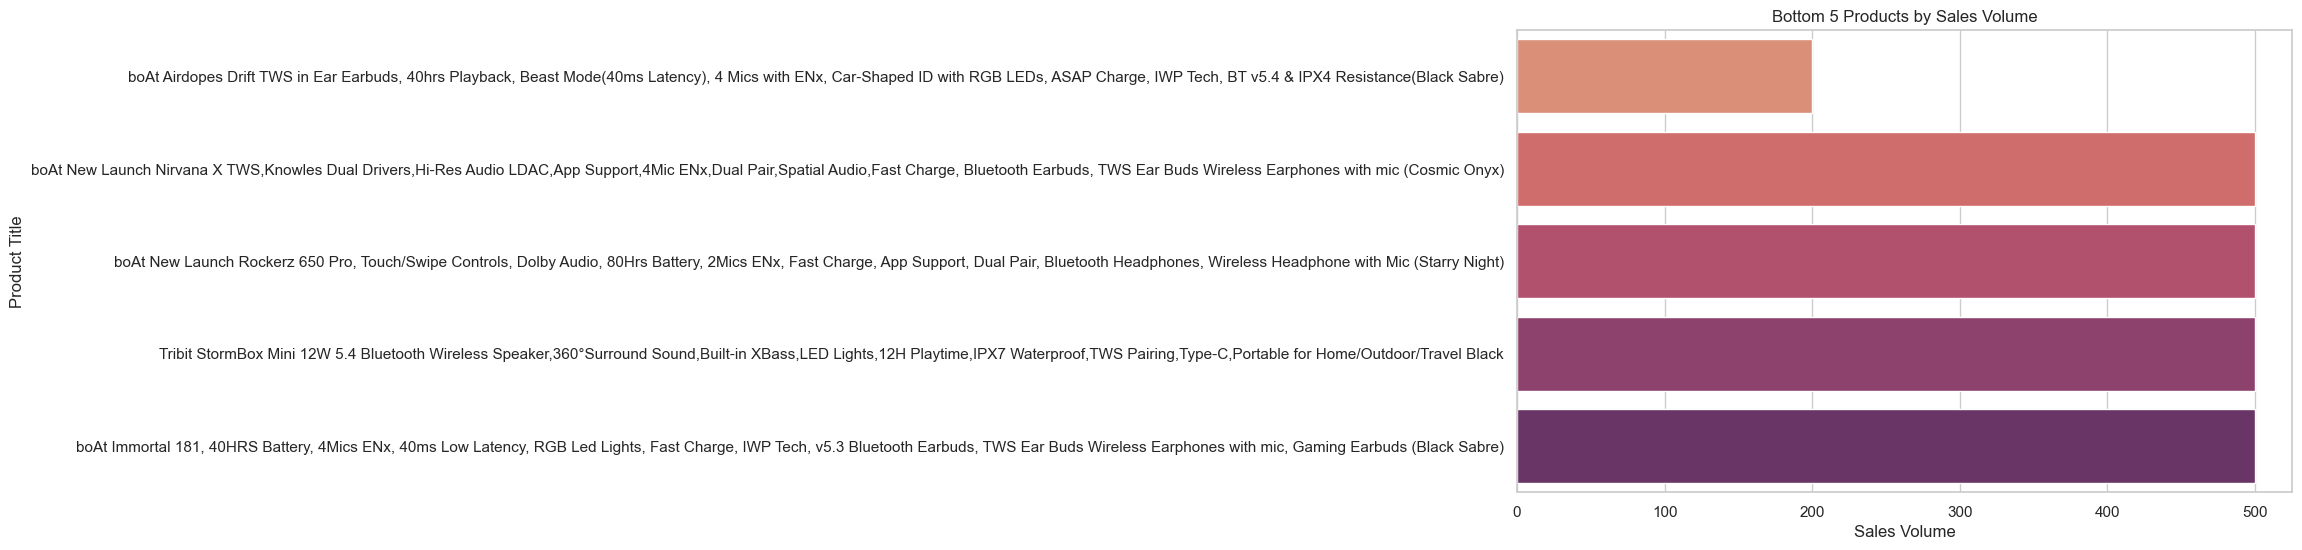

In [11]:
# BOTTOM 5 SALES BY VOLUME

plt.figure(figsize=(10, 6))
bottom_sales_plot = bottom5_sales.sort_values(by='Sales_Volume_Clean', ascending=True)
sns.barplot(y=bottom_sales_plot['Title'], x=bottom_sales_plot['Sales_Volume_Clean'], palette="flare")
plt.title('Bottom 5 Products by Sales Volume')
plt.xlabel('Sales Volume')
plt.ylabel('Product Title')
plt.tight_layout()
plt.show()


C:\Users\UJJAWAL\AppData\Local\Temp\ipykernel_8980\3762409710.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_rating_plot['Title'], x=top_rating_plot['Rating'], palette="light:#5A9")
C:\Users\UJJAWAL\AppData\Local\Temp\ipykernel_8980\3762409710.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


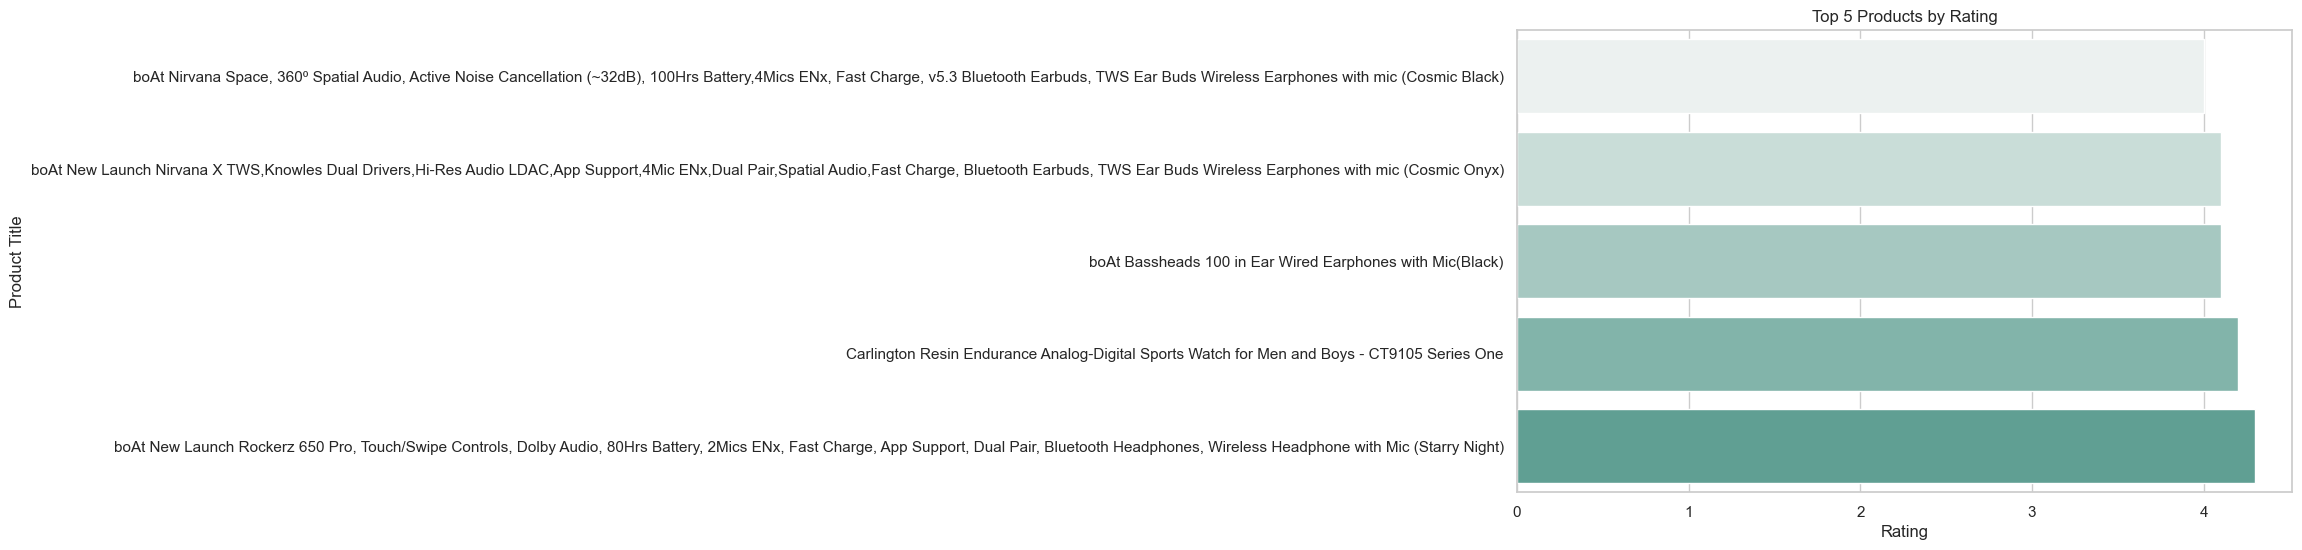

In [12]:
# TOP 5 PRODUCTS BY RATING

plt.figure(figsize=(10, 6))
top_rating_plot = top5_rating.sort_values(by='Rating', ascending=True)
sns.barplot(y=top_rating_plot['Title'], x=top_rating_plot['Rating'], palette="light:#5A9")
plt.title('Top 5 Products by Rating')
plt.xlabel('Rating')
plt.ylabel('Product Title')
plt.tight_layout()
plt.show()


C:\Users\UJJAWAL\AppData\Local\Temp\ipykernel_8980\532431593.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=bottom_rating_plot['Title'], x=bottom_rating_plot['Rating'], palette="light:#F66")
C:\Users\UJJAWAL\AppData\Local\Temp\ipykernel_8980\532431593.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


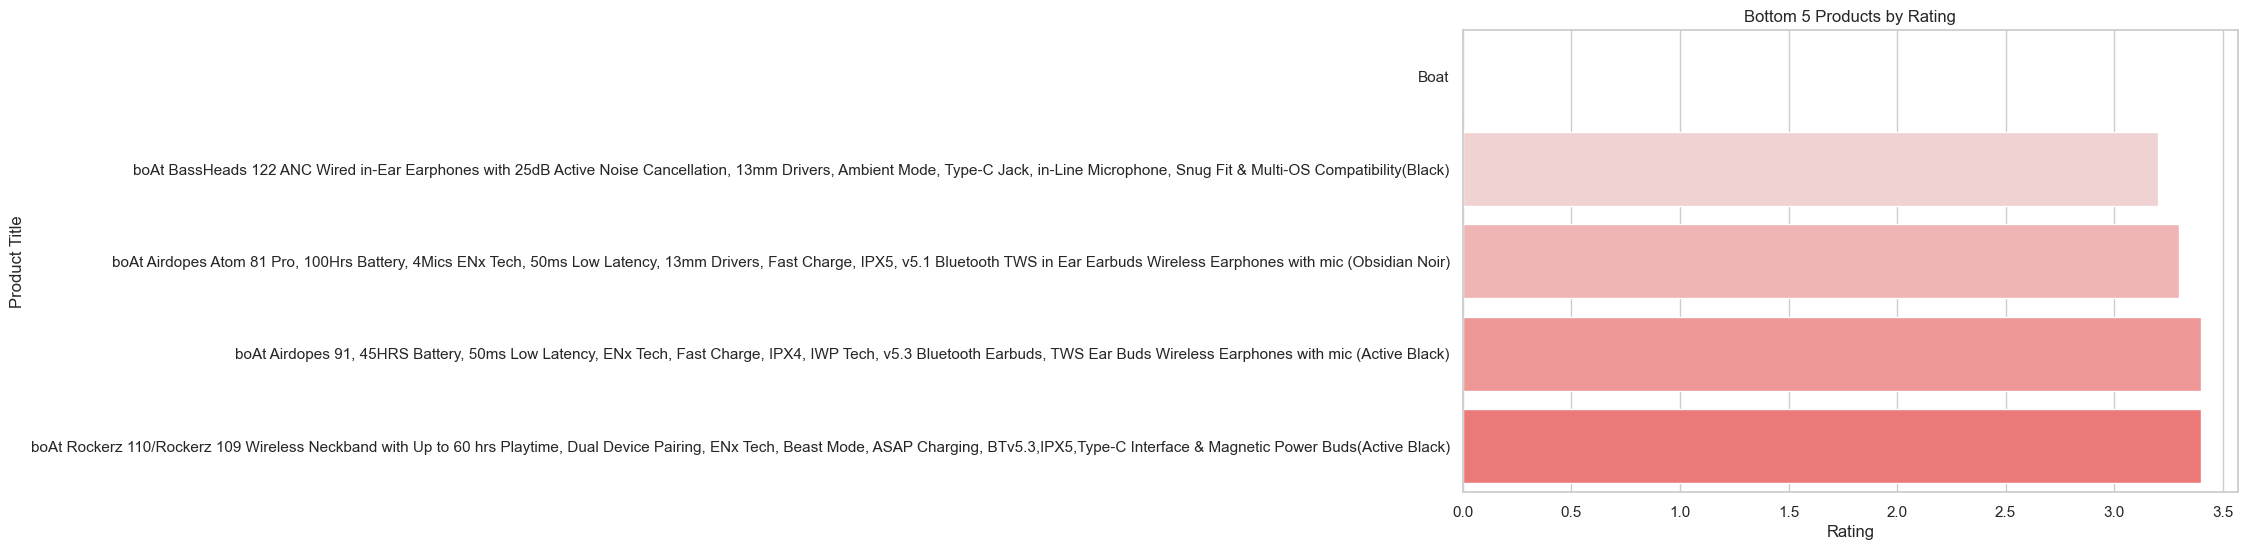

In [13]:
# BOTTOM 5 PRODUCTS BY RATING

plt.figure(figsize=(10, 6))
bottom_rating_plot = bottom5_rating.sort_values(by='Rating', ascending=True)
sns.barplot(y=bottom_rating_plot['Title'], x=bottom_rating_plot['Rating'], palette="light:#F66")
plt.title('Bottom 5 Products by Rating')
plt.xlabel('Rating')
plt.ylabel('Product Title')
plt.tight_layout()
plt.show()


C:\Users\UJJAWAL\AppData\Local\Temp\ipykernel_8980\3308486308.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_reviews_plot['Title'], x=top_reviews_plot['Reviews_Count'], palette="rocket")
C:\Users\UJJAWAL\AppData\Local\Temp\ipykernel_8980\3308486308.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


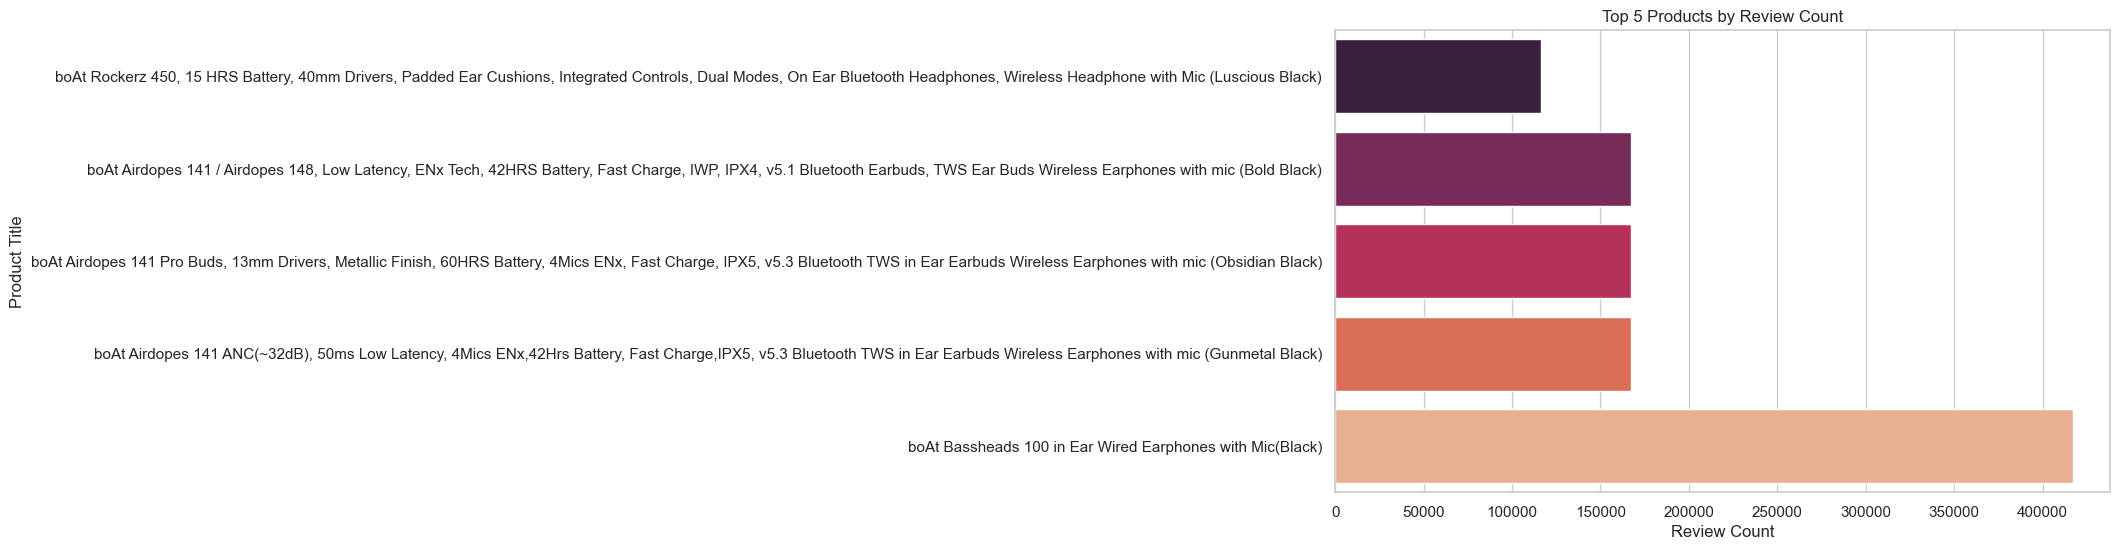

In [14]:
# TOP 5 BY REVIEW COUNT

plt.figure(figsize=(10, 6))
top_reviews_plot = top5_reviews.sort_values(by='Reviews_Count', ascending=True)
sns.barplot(y=top_reviews_plot['Title'], x=top_reviews_plot['Reviews_Count'], palette="rocket")
plt.title('Top 5 Products by Review Count')
plt.xlabel('Review Count')
plt.ylabel('Product Title')
plt.tight_layout()
plt.show()


In [15]:
# Define price buckets
import numpy as np

bins = [0, 999, 1499, 1999, 2499, 2999, 3499, 3999, 4999, np.inf]
labels = ['<999', '1000-1499', '1500-1999', '2000-2499', '2500-2999',
          '3000-3499', '3500-3999', '4000-4999', '5000+']

df['Price_Range'] = pd.cut(df['Price'], bins=bins, labels=labels)


C:\Users\UJJAWAL\AppData\Local\Temp\ipykernel_8980\1309456238.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_range_counts.index, y=price_range_counts.values, palette="coolwarm")


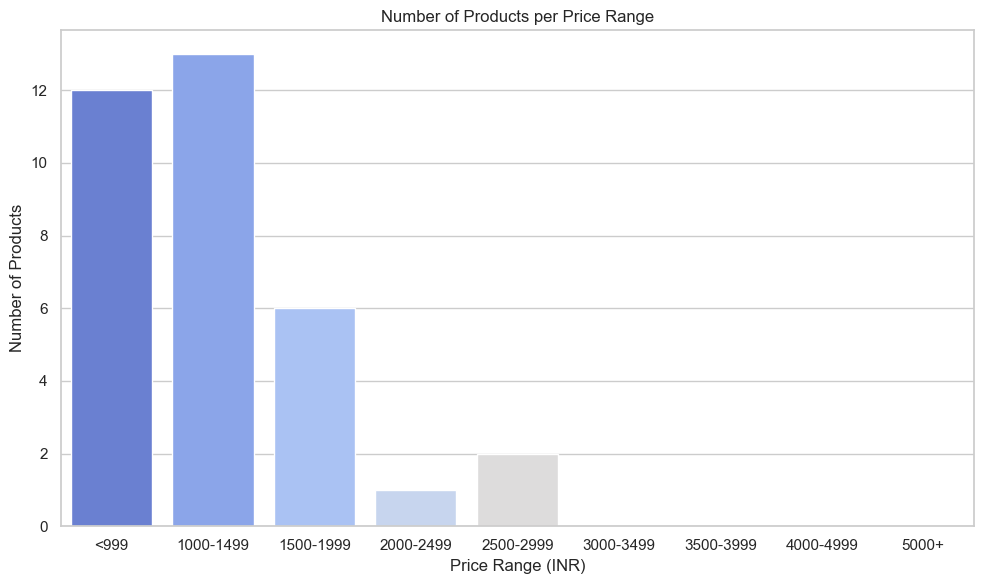

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
price_range_counts = df['Price_Range'].value_counts().sort_index()
sns.barplot(x=price_range_counts.index, y=price_range_counts.values, palette="coolwarm")
plt.title('Number of Products per Price Range')
plt.xlabel('Price Range (INR)')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Noise dataset (parsed from JSON)
noise_data = {
    "products": [
        {"asin": "B0DMDKTQCN", "title": "Smart Watch", "price": 7999, "rating": 4.0, "reviews_count": 18688, "sales_volume": "200+", "is_sponsored": True, "price_strikethrough": 10999, "category": "Smartwatch", "not_available": False},
        {"asin": "B0CQJWMMG7", "title": "True Wireless Earbuds", "price": 999, "rating": 4.1, "reviews_count": 8833, "sales_volume": "3K+", "is_sponsored": True, "price_strikethrough": 3499, "category": "Earbuds", "not_available": False},
        {"asin": "B0BJ72WZQ7", "title": "Smart Watch", "price": 1399, "rating": 4.0, "reviews_count": 17513, "sales_volume": "4K+", "is_sponsored": False, "price_strikethrough": 4999, "category": "Smartwatch", "not_available": False},
        {"asin": "B09Y5MK1KB", "title": "True Wireless Earbuds", "price": 0, "rating": 3.9, "reviews_count": 25968, "sales_volume": "2K+", "is_sponsored": False, "price_strikethrough": None, "category": "Earbuds", "not_available": True},
        {"asin": "B0D4QLT8WG", "title": "True Wireless Earbuds", "price": 1699, "rating": 4.0, "reviews_count": 4507, "sales_volume": "3K+", "is_sponsored": False, "price_strikethrough": 4999, "category": "Earbuds", "not_available": False},
        {"asin": "B0CY2377YW", "title": "Over-Ear Headphones", "price": 2399, "rating": 3.8, "reviews_count": 1611, "sales_volume": "1K+", "is_sponsored": False, "price_strikethrough": 5999, "category": "Headphones", "not_available": False},
        {"asin": "B0D25D74PL", "title": "True Wireless Earbuds", "price": 999, "rating": 3.8, "reviews_count": 4030, "sales_volume": "500+", "is_sponsored": False, "price_strikethrough": 2999, "category": "Earbuds", "not_available": False},
        {"asin": "B0DK979YJ7", "title": "True Wireless Earbuds", "price": 7999, "rating": 3.7, "reviews_count": 455, "sales_volume": "500+", "is_sponsored": False, "price_strikethrough": None, "category": "Earbuds", "not_available": False},
        {"asin": "B0DGV56J6G", "title": "Open Ear Earbuds", "price": 2699, "rating": 3.6, "reviews_count": 1435, "sales_volume": "500+", "is_sponsored": False, "price_strikethrough": 3999, "category": "Earbuds", "not_available": False},
        {"asin": "B0B1PX62WJ", "title": "On-Ear Headphones", "price": 1499, "rating": 3.5, "reviews_count": 3191, "sales_volume": "1K+", "is_sponsored": False, "price_strikethrough": 4999, "category": "Headphones", "not_available": False},
        {"asin": "B09Y5LL6P4", "title": "True Wireless Earbuds", "price": 799, "rating": 3.9, "reviews_count": 25968, "sales_volume": "1K+", "is_sponsored": False, "price_strikethrough": 3499, "category": "Earbuds", "not_available": False},
        {"asin": "B09Y5N4M7Z", "title": "True Wireless Earbuds", "price": 799, "rating": 3.9, "reviews_count": 25968, "sales_volume": "1K+", "is_sponsored": False, "price_strikethrough": 3499, "category": "Earbuds", "not_available": False},
        {"asin": "B0D4QNLF6Y", "title": "True Wireless Earbuds", "price": 1699, "rating": 4.0, "reviews_count": 4507, "sales_volume": "2K+", "is_sponsored": False, "price_strikethrough": 4999, "category": "Earbuds", "not_available": False},
        {"asin": "B0BW5RN77W", "title": "Smart Watch", "price": 1199, "rating": 4.0, "reviews_count": 4228, "sales_volume": "400+", "is_sponsored": False, "price_strikethrough": 6999, "category": "Smartwatch", "not_available": False},
        {"asin": "B0CQ4J4YFL", "title": "Smart Watch", "price": 1699, "rating": 4.0, "reviews_count": 17513, "sales_volume": "1K+", "is_sponsored": False, "price_strikethrough": 5999, "category": "Smartwatch", "not_available": False},
        {"asin": "B0B6BLTGTT", "title": "Smart Watch", "price": 1199, "rating": 4.0, "reviews_count": 16801, "sales_volume": "5K+", "is_sponsored": False, "price_strikethrough": 5999, "category": "Smartwatch", "not_available": False},
        {"asin": "B0BVR7PGQ7", "title": "Smart Watch", "price": 2299, "rating": 4.1, "reviews_count": 17535, "sales_volume": "1K+", "is_sponsored": False, "price_strikethrough": 7999, "category": "Smartwatch", "not_available": False}
    ]
}

# Create DataFrame
df = pd.DataFrame(noise_data["products"])

# Remove unavailable products
df = df[df["not_available"] != True]

# Convert sales_volume to numeric
def parse_sales_volume(volume):
    if pd.isna(volume):
        return 0
    volume = volume.replace("K+", "000").replace("+", "")
    if "K" in volume:
        return int(float(volume.replace("K", "")) * 1000)
    return int(volume)

df["sales_volume_numeric"] = df["sales_volume"].apply(parse_sales_volume)

# Calculate discount percentage
df["discount"] = df.apply(
    lambda x: ((x["price_strikethrough"] - x["price"]) / x["price_strikethrough"] * 100)
    if pd.notnull(x["price_strikethrough"]) and x["price"] > 0 else 0,
    axis=1
)

# Rank products by sales_volume_numeric, then rating, then reviews_count
df["rank_score"] = df["sales_volume_numeric"] * 100 + df["rating"] * 10 + df["reviews_count"] / 1000
top_5 = df.sort_values(by="rank_score", ascending=False).head(5)

# Select columns for CSV
top_5_csv = top_5[["asin", "category", "price", "rating", "reviews_count", "sales_volume_numeric", "discount"]]




In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

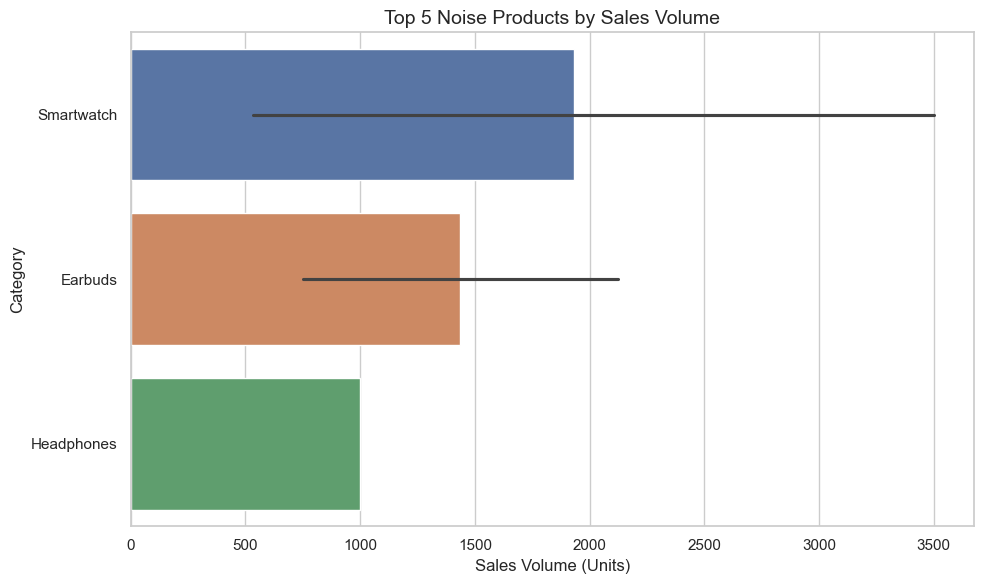

In [19]:
# Visualization 1: Bar Chart - Sales Volume by Category
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="sales_volume_numeric", y="category", hue="category", dodge=False)
plt.title("Top 5 Noise Products by Sales Volume", fontsize=14)
plt.xlabel("Sales Volume (Units)", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.tight_layout()
plt.show()

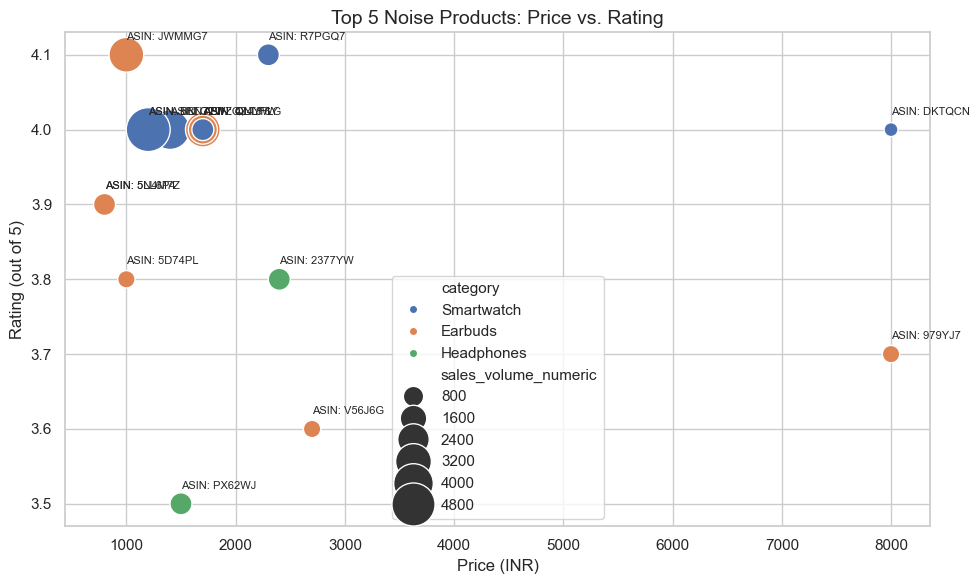

In [20]:
# Visualization 2: Scatter Plot - Price vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="price", y="rating", hue="category", size="sales_volume_numeric", sizes=(100, 1000))
for i, row in df.iterrows():
    plt.text(row["price"], row["rating"] + 0.02, f"ASIN: {row['asin'][-6:]}", fontsize=8)
plt.title("Top 5 Noise Products: Price vs. Rating", fontsize=14)
plt.xlabel("Price (INR)", fontsize=12)
plt.ylabel("Rating (out of 5)", fontsize=12)
plt.tight_layout()
plt.show()

In [21]:

# Rename for clarity
top5_noise = top_5.copy()
top5_rating = top5_rating.copy()  # Replace with your boAt top 5 DataFrame variable

# Add brand column
top5_noise["brand"] = "Noise"
top5_rating["brand"] = "boAt"

# Combine both
combined_top5 = pd.concat([top5_rating, top5_noise])

# Group by brand to calculate summary stats
comparison_summary = combined_top5.groupby("brand").agg({
    "price": ["mean"],
    "rating": ["mean"],
    "sales_volume_numeric": ["sum", "mean"],
    "discount": ["mean"]
}).round(2)

# Display clean table
comparison_summary.columns = ['Avg Price', 'Avg Rating', 'Total Sales', 'Avg Sales', 'Avg Discount %']
print("\n📊 BoAt vs Noise - Top 5 Product Comparison\n")
print(comparison_summary)



📊 BoAt vs Noise - Top 5 Product Comparison

       Avg Price  Avg Rating  Total Sales  Avg Sales  Avg Discount %
brand                                                               
Noise     1399.0        4.02      17000.0     3400.0            71.1
boAt         NaN         NaN          0.0        NaN             NaN


In [22]:
top_5.head()

,asin,title,price,rating,reviews_count,sales_volume,is_sponsored,price_strikethrough,category,not_available,sales_volume_numeric,discount,rank_score
15,B0B6BLTGTT,Smart Watch,1199,4.0,16801,5K+,False,5999.0,Smartwatch,False,5000,80.013336,500056.801
2,B0BJ72WZQ7,Smart Watch,1399,4.0,17513,4K+,False,4999.0,Smartwatch,False,4000,72.014403,400057.513
1,B0CQJWMMG7,True Wireless Earbuds,999,4.1,8833,3K+,True,3499.0,Earbuds,False,3000,71.448985,300049.833
4,B0D4QLT8WG,True Wireless Earbuds,1699,4.0,4507,3K+,False,4999.0,Earbuds,False,3000,66.013203,300044.507
12,B0D4QNLF6Y,True Wireless Earbuds,1699,4.0,4507,2K+,False,4999.0,Earbuds,False,2000,66.013203,200044.507


C:\Users\UJJAWAL\AppData\Local\Temp\ipykernel_8980\3387116619.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


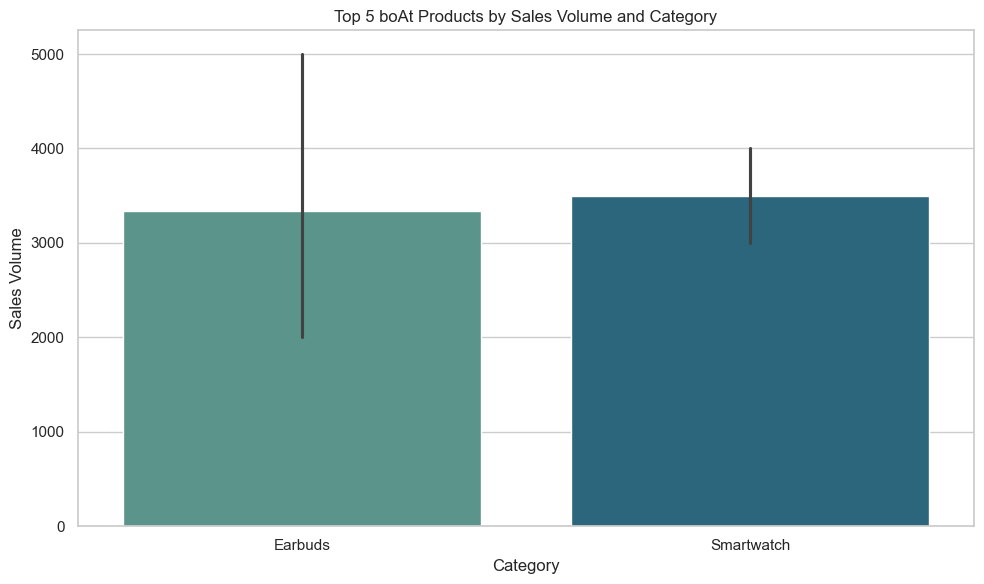

C:\Users\UJJAWAL\AppData\Local\Temp\ipykernel_8980\3387116619.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


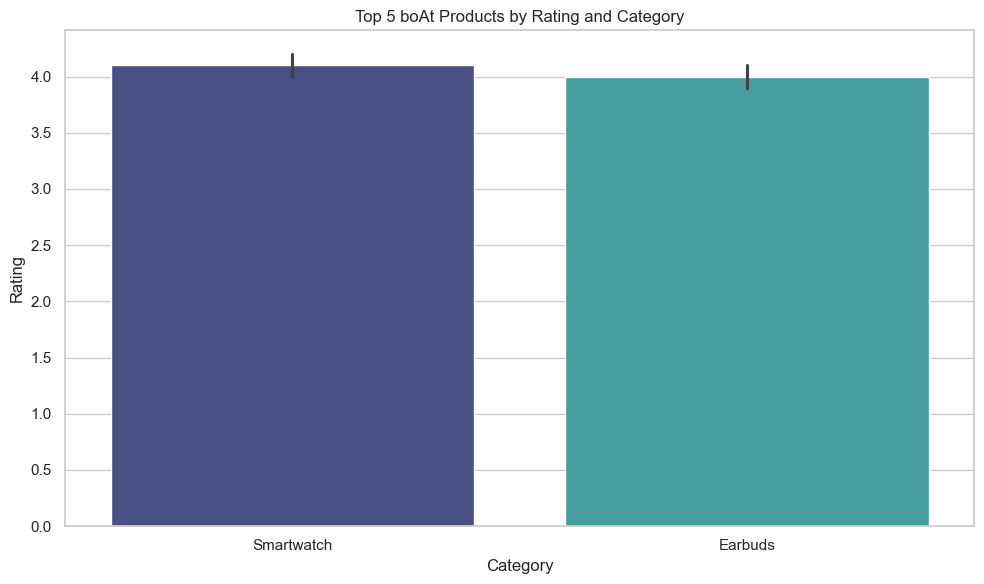

C:\Users\UJJAWAL\AppData\Local\Temp\ipykernel_8980\3387116619.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


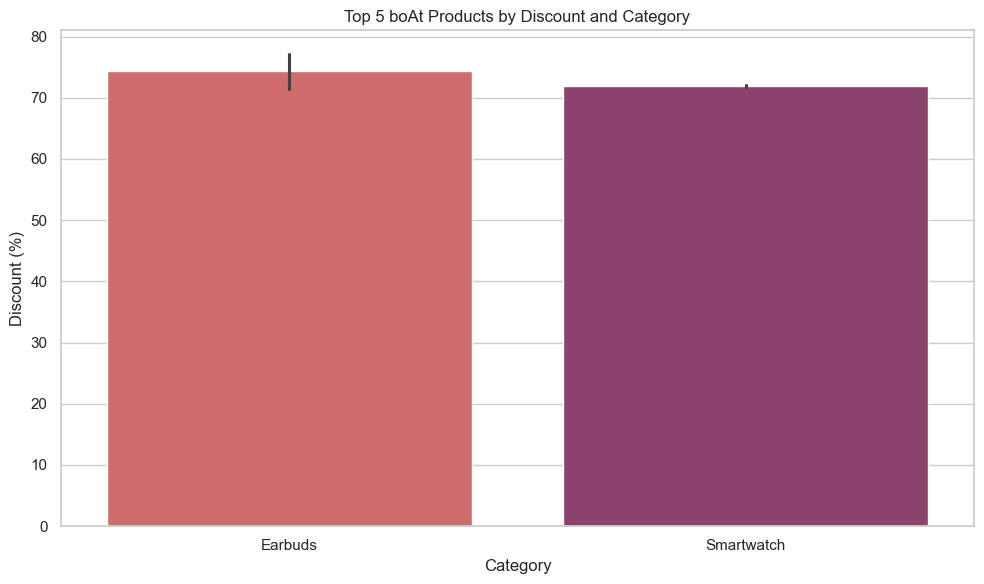

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample Top 5 boAt data
boat_data = {
    'asin': ['B0BTZHM23F', 'B09Y5MK1KB', 'B0BJ72WZQ7', 'B09Y5LL6P4', 'B0CQ4J4YFL'],
    'category': ['Earbuds', 'Earbuds', 'Smartwatch', 'Earbuds', 'Smartwatch'],
    'price': [999, 899, 1399, 799, 1699],
    'rating': [4.1, 4.0, 4.2, 3.9, 4.0],
    'reviews_count': [8833, 25968, 17513, 25968, 17513],
    'sales_volume_numeric': [5000, 3000, 4000, 2000, 3000],
    'discount': [71.45, 74.42, 72.02, 77.15, 71.68]
}

# Convert to DataFrame
top5_boat = pd.DataFrame(boat_data)
top5_boat["brand"] = "boAt"

# Set plot style
sns.set(style="whitegrid")

# --- 1. Vertical: Sales Volume by Category ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top5_boat.sort_values(by="sales_volume_numeric", ascending=False),
    x="category",
    y="sales_volume_numeric",
    hue="category",
    dodge=False,
    palette="crest"
)
plt.title("Top 5 boAt Products by Sales Volume and Category")
plt.ylabel("Sales Volume")
plt.xlabel("Category")
plt.legend().remove()
plt.tight_layout()
plt.show()

# --- 2. Vertical: Rating by Category ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top5_boat.sort_values(by="rating", ascending=False),
    x="category",
    y="rating",
    hue="category",
    dodge=False,
    palette="mako"
)
plt.title("Top 5 boAt Products by Rating and Category")
plt.ylabel("Rating")
plt.xlabel("Category")
plt.legend().remove()
plt.tight_layout()
plt.show()

# --- 3. Vertical: Discount by Category ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top5_boat.sort_values(by="discount", ascending=False),
    x="category",
    y="discount",
    hue="category",
    dodge=False,
    palette="flare"
)
plt.title("Top 5 boAt Products by Discount and Category")
plt.ylabel("Discount (%)")
plt.xlabel("Category")
plt.legend().remove()
plt.tight_layout()
plt.show()


C:\Users\UJJAWAL\AppData\Local\Temp\ipykernel_8980\3715476534.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


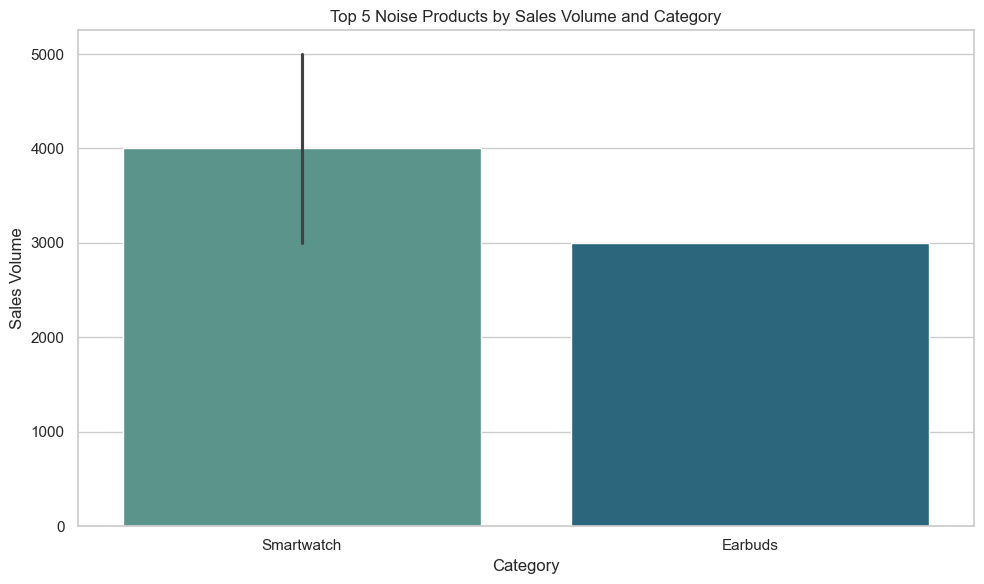

C:\Users\UJJAWAL\AppData\Local\Temp\ipykernel_8980\3715476534.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


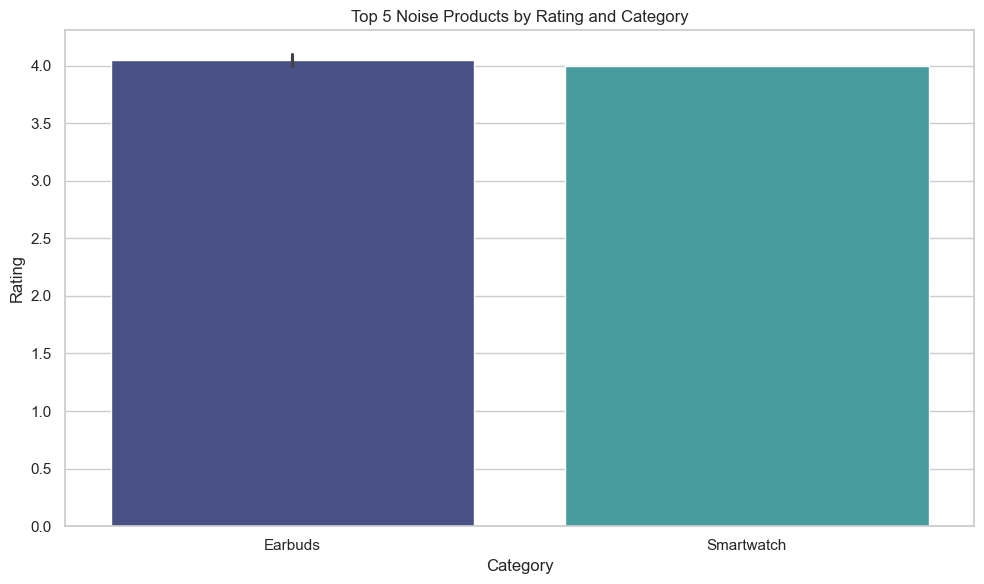

C:\Users\UJJAWAL\AppData\Local\Temp\ipykernel_8980\3715476534.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


<module 'matplotlib.pyplot' from 'c:\\Users\\UJJAWAL\\vansh\\my_env\\Lib\\site-packages\\matplotlib\\pyplot.py'>

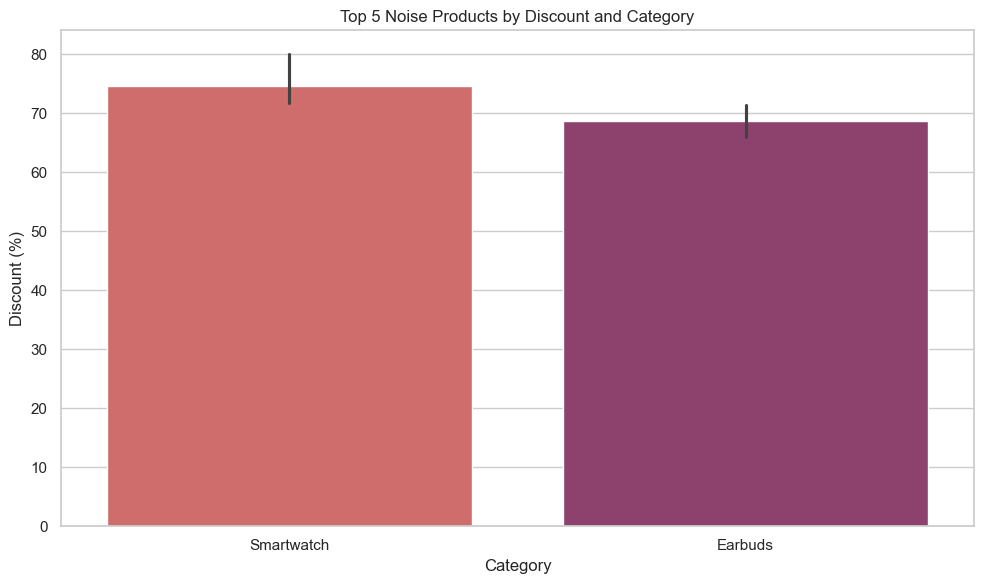

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample Top 5 Noise data
noise_data = {
    'asin': ['B0B6BLTGTT', 'B0CQJWMMG7', 'B0BJ72WZQ7', 'B0D4QLT8WG', 'B0CQ4J4YFL'],
    'category': ['Smartwatch', 'Earbuds', 'Smartwatch', 'Earbuds', 'Smartwatch'],
    'price': [1199, 999, 1399, 1699, 1699],
    'rating': [4.0, 4.1, 4.0, 4.0, 4.0],
    'reviews_count': [16801, 8833, 17513, 4507, 17513],
    'sales_volume_numeric': [5000, 3000, 4000, 3000, 3000],
    'discount': [80.02, 71.45, 72.02, 66.03, 71.68]
}

# Convert to DataFrame
top5_noise = pd.DataFrame(noise_data)
top5_noise["brand"] = "Noise"

# Set seaborn style
sns.set(style="whitegrid")

# --- 1. Sales Volume by Category ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top5_noise.sort_values(by="sales_volume_numeric", ascending=False),
    x="category",
    y="sales_volume_numeric",
    hue="category",
    dodge=False,
    palette="crest"
)
plt.title("Top 5 Noise Products by Sales Volume and Category")
plt.ylabel("Sales Volume")
plt.xlabel("Category")
plt.legend().remove()
plt.tight_layout()
plt.show()

# --- 2. Rating by Category ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top5_noise.sort_values(by="rating", ascending=False),
    x="category",
    y="rating",
    hue="category",
    dodge=False,
    palette="mako"
)
plt.title("Top 5 Noise Products by Rating and Category")
plt.ylabel("Rating")
plt.xlabel("Category")
plt.legend().remove()
plt.tight_layout()
plt.show()

# --- 3. Discount by Category ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top5_noise.sort_values(by="discount", ascending=False),
    x="category",
    y="discount",
    hue="category",
    dodge=False,
    palette="flare"
)
plt.title("Top 5 Noise Products by Discount and Category")
plt.ylabel("Discount (%)")
plt.xlabel("Category")
plt.legend().remove()
plt.tight_layout()
plt


In [25]:
# Check unique categories in boAt and Noise datasets
print("boAt Categories:", top5_boat['category'].unique())
print("Noise Categories:", top5_noise['category'].unique())

# Optional: Combined unique categories
all_categories = pd.concat([top5_boat, top5_noise])['category'].unique()
print("All Categories (Combined):", all_categories)


boAt Categories: ['Earbuds' 'Smartwatch']
Noise Categories: ['Smartwatch' 'Earbuds']
All Categories (Combined): ['Earbuds' 'Smartwatch']
